In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [92]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)
model.fit(X_train, y_train)

#Hint: .fit()

LinearRegression()

In this part, we create a simple linear regression model to predict house prices (price) based on the living area size (sqft_living).
The dataset is split into training (90%) and testing (10%) subsets.
Then, the model is trained on the training data using the .fit() method.


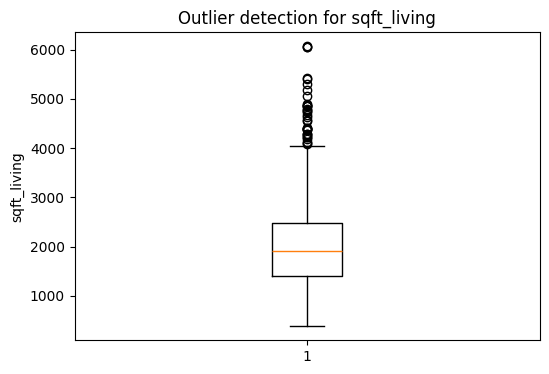

In [93]:
plt.figure(figsize=(6,4))
plt.boxplot(X)
plt.title("Outlier detection for sqft_living")
plt.ylabel("sqft_living")
plt.show()

In [94]:
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (X < lower_bound) | (X > upper_bound)
num_outliers = np.sum(outliers_mask)

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Number of outliers in sqft_living:", num_outliers)


Lower bound: -190.0
Upper bound: 4070.0
Number of outliers in sqft_living: 36


The boxplot and IQR (Interquartile Range) analysis show that the sqft_living feature contains several outliers, with unusually large houses exceeding 4000 sqft.
IQR analysis measures the spread of the middle 50% of the data and helps identify values that lie far outside this range.
These extreme values can distort the scale of the data and negatively affect both linear and polynomial regression, causing instability and poor coefficient estimation.
To handle this issue, I will use RobustScaler, which scales the data using the median and interquartile range, making the model more stable and less sensitive to outliers.

Model coefficient (slope): 273.2445
Model intercept: -37535.3091
Mean squared error: 57965184740.35
R² score: 0.4966


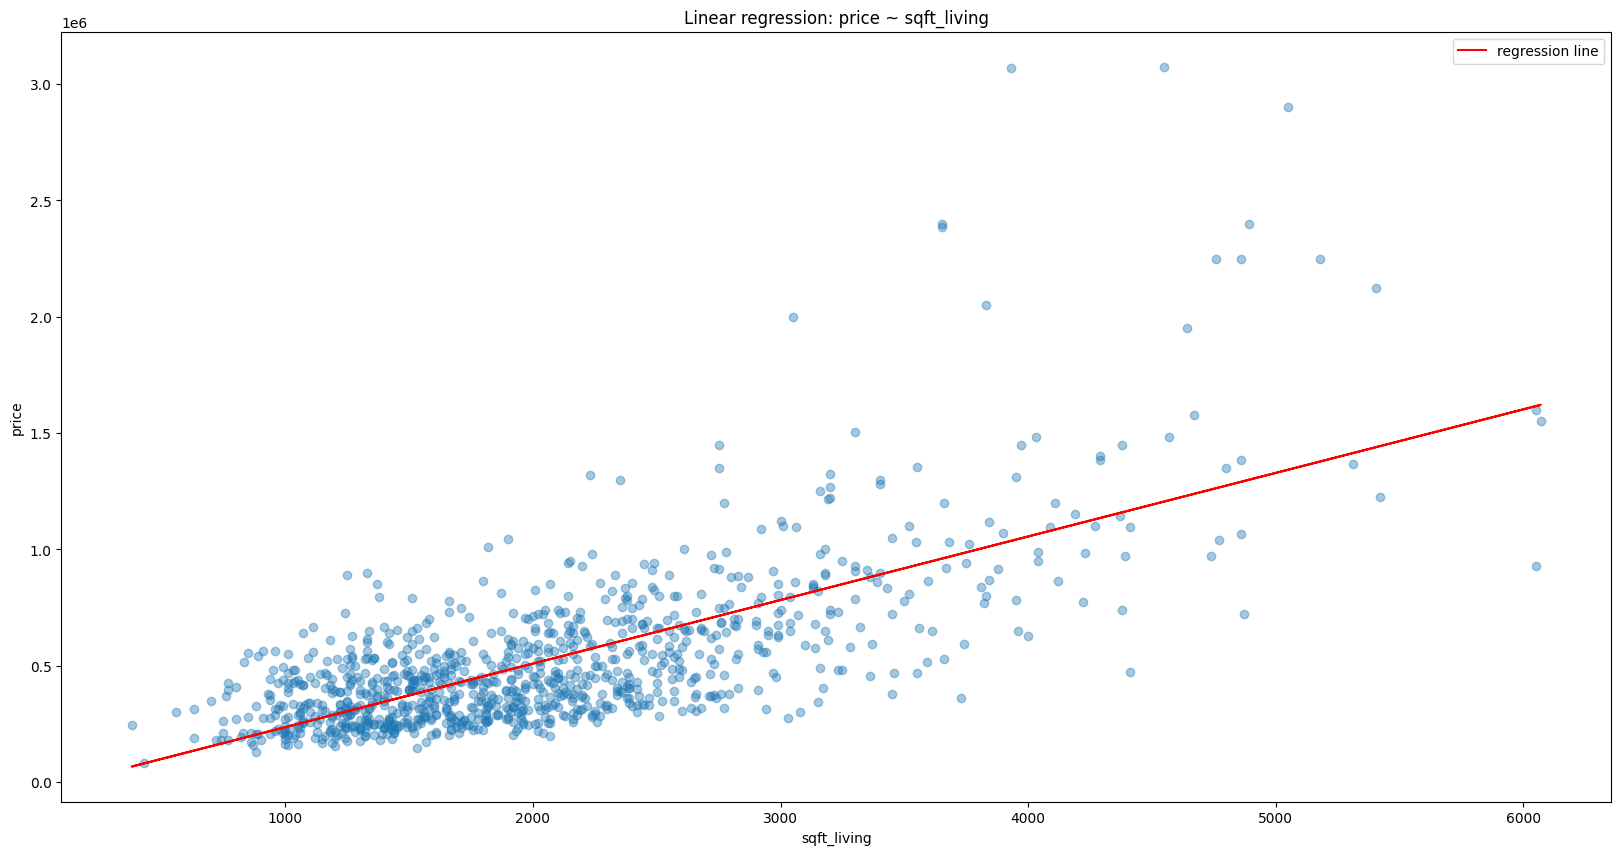

In [95]:
#b)

#Your code:

# Predict values using the trained model
y_pred = model.predict(X)

# Visualization
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.4)
plt.plot(X, y_pred, "r", label="regression line")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("Linear regression: price ~ sqft_living")
plt.legend()

# Evaluation
mse = mean_squared_error(y, y_pred)
r2 = model.score(X, y)

# Display coefficients and intercept
print(f"Model coefficient (slope): {model.coef_[0]:.4f}")
print(f"Model intercept: {model.intercept_:.4f}")
print(f"Mean squared error: {mse:.2f}")
print(f"R² score: {r2:.4f}")

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

A simple linear regression model was trained to predict house price based on living area size (sqft_living).
The red line on the plot shows the regression fit, while blue dots represent actual data.

## Results:

Slope: 260.10 → each extra square foot adds about $260 to the predicted price.

Intercept: –17,248.92 → theoretical base price (not meaningful in practice).

R² = 0.496 → the model explains about 50% of how much prices change depending on house size — meaning that size is an important factor, but not the only one.

MSE ≈ 5.8×10¹⁰ → shows that prediction errors are quite large, which is expected given the wide range of prices.

## Interpretation:
The model captures a clear positive trend — larger houses tend to be more expensive — but there is a lot of spread around the line, so other features (like location or condition) also strongly affect the final price.

## Note on scaling:

RobustScaler was not used here because the model involves only one feature in its original scale.
Scaling has no impact on simple linear regression with a single variable, but it becomes essential later in polynomial regression to prevent numerical instability caused by large or outlier values.

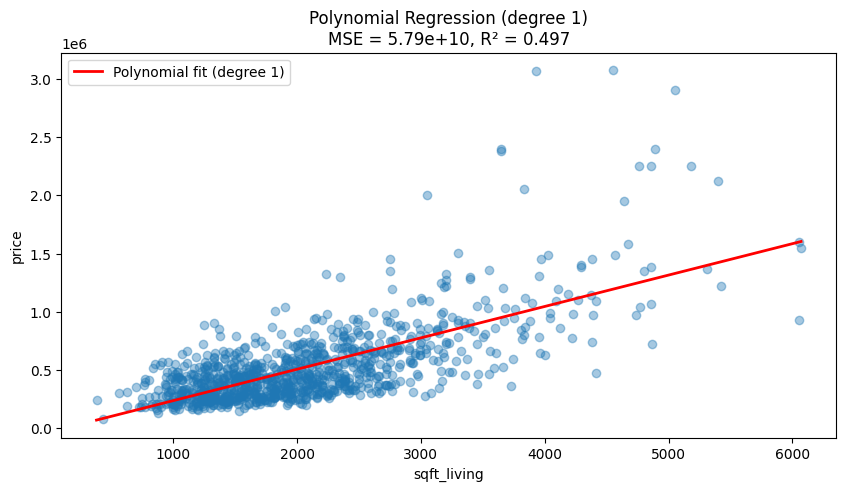

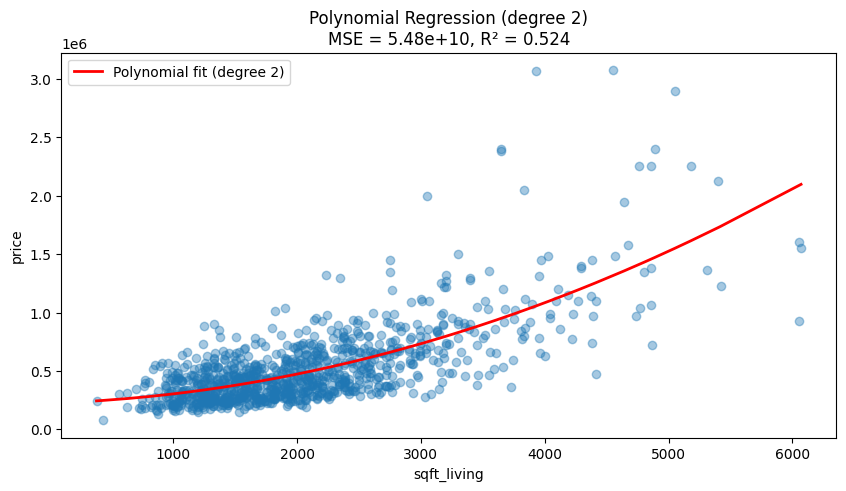

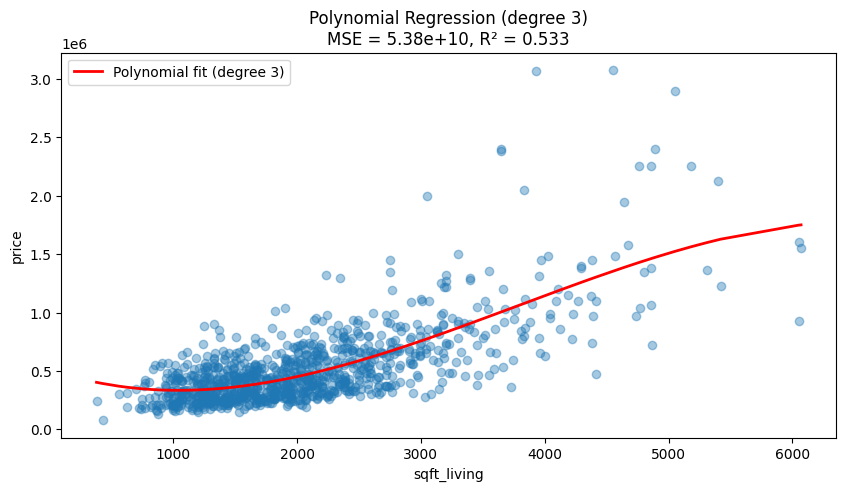

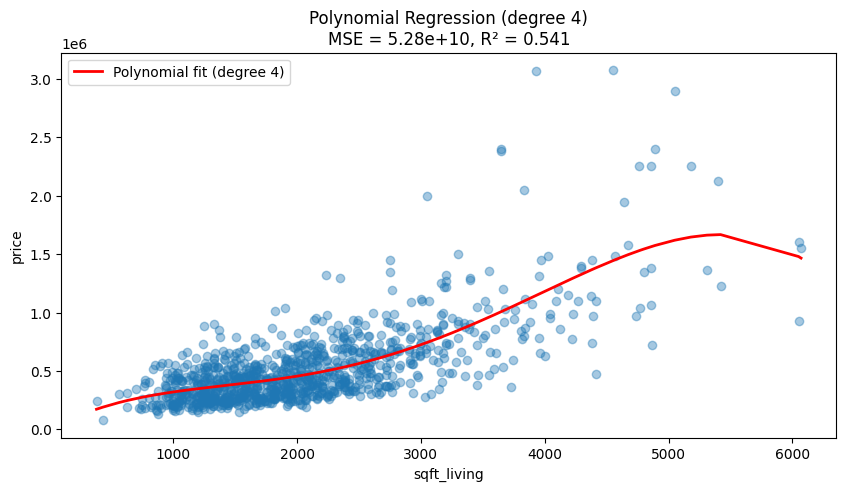

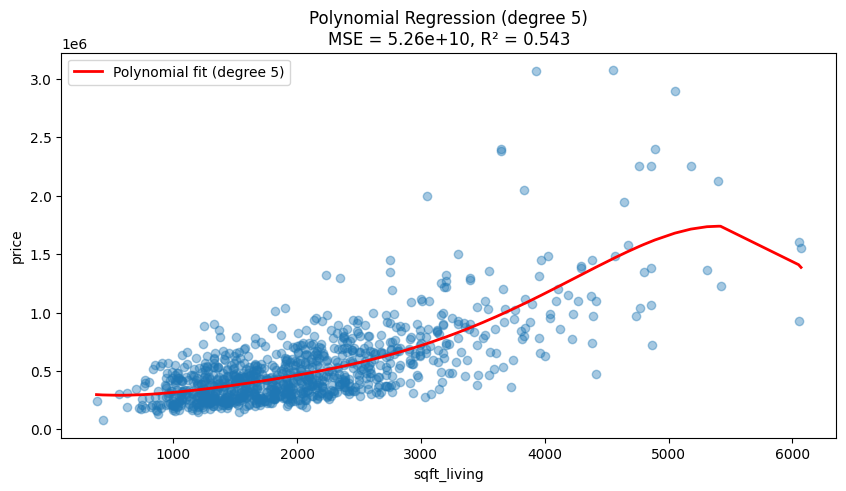

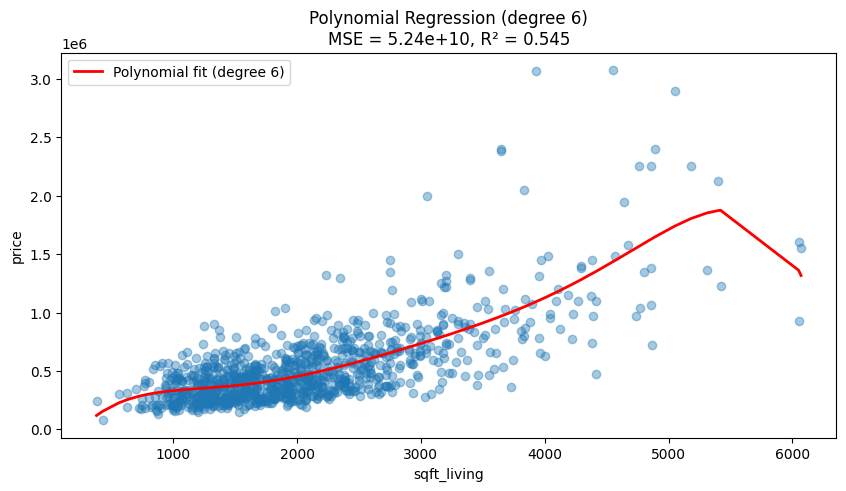

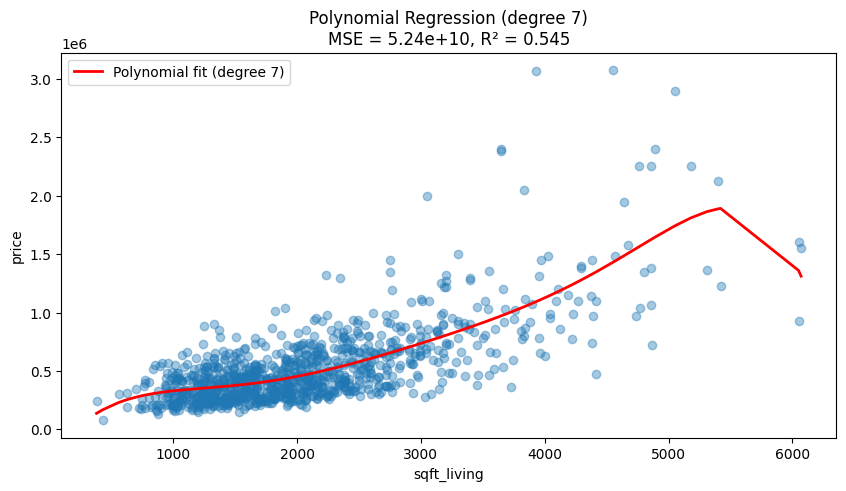

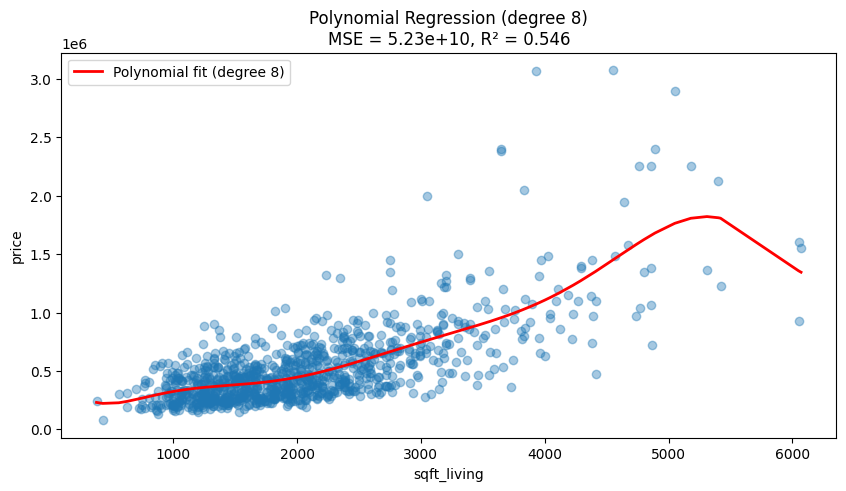

In [96]:
#c)

# scale the feature
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

mse_list = []

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X_scaled)

    #Your code:

    # 1. Create and fit a linear regression model
    model_poly = LinearRegression()
    model_poly.fit(X_order, y)

    # 2. Predict prices using the trained model
    y_pred = model_poly.predict(X_order)

    # 3. Compute mean squared error and R² score for evaluation
    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)
    r2 = model_poly.score(X_order, y)

    # 4. Sort X for smooth plotting of the regression curve
    sort_idx = np.argsort(X[:, 0])
    X_sorted = X[sort_idx, 0]
    y_pred_sorted = y_pred[sort_idx]

    # 5. Visualize the polynomial fit
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, alpha=0.4)
    plt.plot(X_sorted, y_pred_sorted, color="red", linewidth=2,
             label=f"Polynomial fit (degree {order})")
    plt.xlabel("sqft_living")
    plt.ylabel("price")
    plt.title(f"Polynomial Regression (degree {order})\nMSE = {mse:.2e}, R² = {r2:.3f}")
    plt.legend()
    plt.show()


Polynomial regression models of degrees 1–8 were created and plotted after scaling the input feature with RobustScaler to reduce the impact of outliers.
As the polynomial degree increases, the fitted curve becomes smoother and follows the data trend more accurately.
After around degree 5, both the curve and R² values stop improving significantly (R² ≈ 0.55), indicating that higher-degree polynomials add complexity without meaningful benefit.
RobustScaler was chosen instead of StandardScaler because the dataset contains outliers — very large or small houses — that would distort the mean and standard deviation used by StandardScaler.
By using the median and interquartile range (IQR) for scaling, RobustScaler provides more stable and reliable transformations, ensuring that extreme values do not dominate the model.

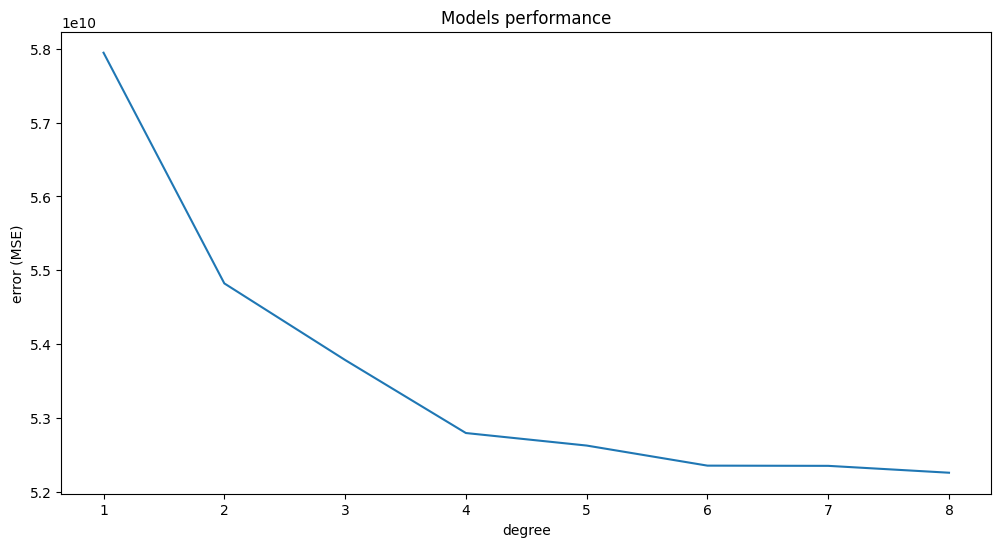

In [97]:
#Your code:

degrees = list(range(1, 9))
plt.figure(figsize=(12,6))
plt.plot(degrees, mse_list)
plt.xlabel("degree")
plt.ylabel("error (MSE)")
plt.title("Models performance")
plt.show()

The plot shows how the Mean Squared Error (MSE) on the training data changes with increasing polynomial degree.
As model complexity grows, the training error decreases — the model fits the training set more closely.
After around degree 5, the improvement becomes minimal, indicating that higher-degree polynomials do not significantly reduce error and may only add unnecessary complexity.
This confirms that a moderately complex model provides the best balance between accuracy and simplicity on the training data.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

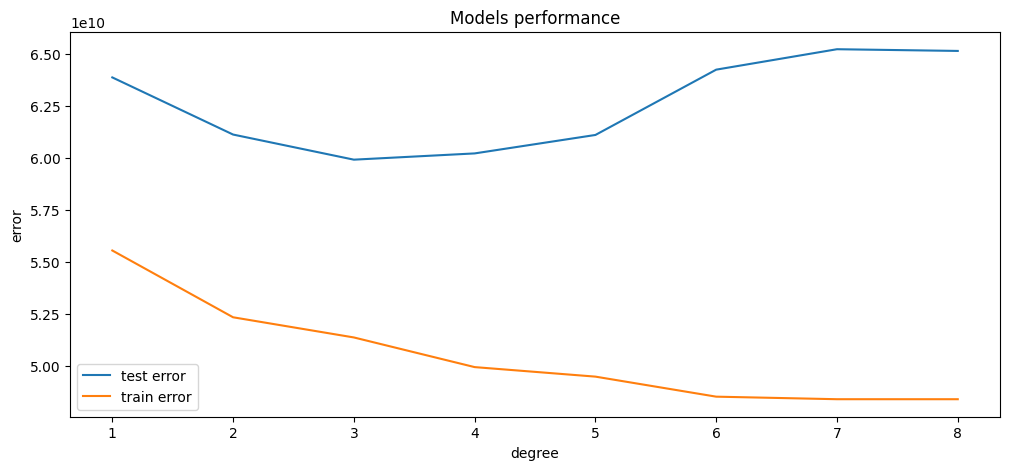

In [98]:
#a)

# scale the feature
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

mse_train_list = []
mse_test_list = []

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X_scaled)

    #Your code:

    # 1. Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    # 2. Create and fit a linear regression model on training data
    model_poly = LinearRegression()
    model_poly.fit(X_train, y_train)

    # 3. Predict prices using the trained model
    y_train_pred = model_poly.predict(X_train)
    y_test_pred = model_poly.predict(X_test)

    # 4. Compute mean squared error for training and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# 5. Plot training and test errors for all polynomial degrees
plt.figure(figsize=(12,5))
plt.plot(range(1,9), mse_test_list, label="test error")
plt.plot(range(1,9), mse_train_list, label="train error")
plt.xlabel("degree")
plt.ylabel("error")
plt.title("Models performance")
plt.legend()
plt.show()


The plot shows training and test MSE for polynomial models of degrees 1–8.
The training error decreases steadily with model complexity, while the test error first decreases and then slightly increases after degree 4, indicating mild overfitting.

The data was split into training and test sets to evaluate how well each model generalizes to unseen data.
This separation is important because it prevents the model from being evaluated on the same data it was trained on, allowing a fair comparison of performance and detection of overfitting.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

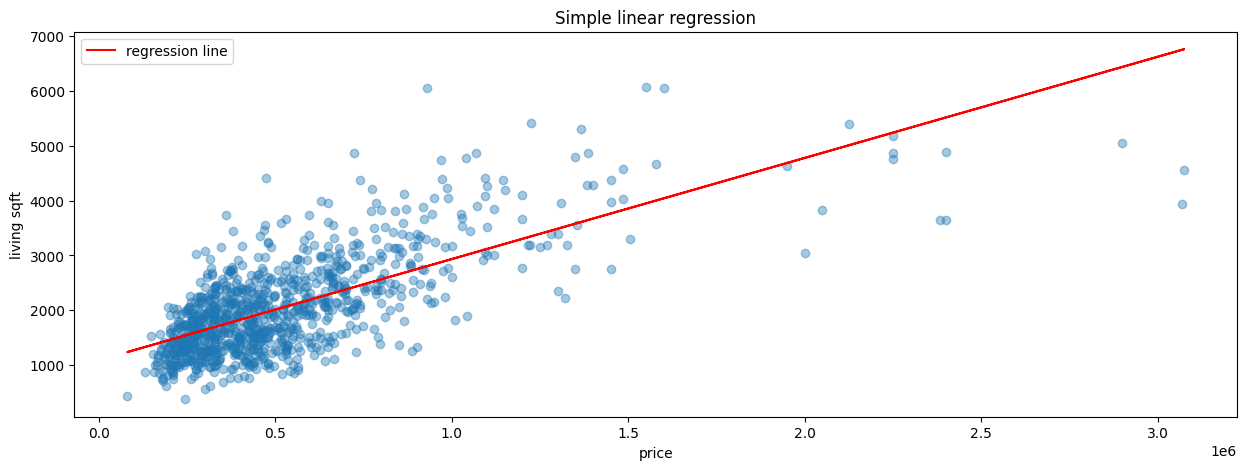

Mean squared error equals: 396407.1889615157


In [99]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression()
model.fit(X, y)

# Predict and visualize
plt.figure(figsize=(15,5))
plt.scatter(X, y, alpha=0.4)
plt.plot(X, model.predict(X), "r", label="regression line")
plt.xlabel("price")
plt.ylabel("living sqft")
plt.title("Simple linear regression")
plt.legend()
plt.show()

# Evaluate model
mse = mean_squared_error(y, model.predict(X))
print("Mean squared error equals:", mse)


A simple linear regression model was trained to predict living area from house price.
The plot shows a positive relationship — more expensive houses tend to be larger - but the data is widely scattered, so price alone is not a strong predictor.

In [100]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 54053591747.298004


In [101]:
#Your model:

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge

# 1. Prepare the same raw features
X_raw = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

# 2. Scale features to reduce the impact of outliers (big houses, huge lots, etc.)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_raw)

# 3. Generate polynomial features (degree 3, same idea as baseline)
poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# 4. Train/test split (same test_size and random_state to compare fairly)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5, random_state=43)

# 5. Train a regularized linear model (Ridge) to reduce overfitting
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 6. Evaluate
y_pred_ridge = ridge_model.predict(X_test)
print("Mean squared error (Ridge + scaling): {0}".format(mean_squared_error(y_pred_ridge, y_test)))


Mean squared error (Ridge + scaling): 48431641968.92831


A Ridge regression model with RobustScaler was used instead of a simple linear model.
Unlike the baseline model, which directly applied polynomial features to raw data, this version first scales input features using the RobustScaler to reduce the influence of outliers (very large houses or lots) and then applies L2 regularization (Ridge) to prevent overfitting caused by the large number of polynomial terms.
Ridge regression adds a small penalty during training to keep the model’s weights smaller, which helps prevent overfitting and makes the model more stable when learning from complex data.

As a result, the MSE decreased from 5.41×10¹⁰ to 4.84×10¹⁰, showing that scaling and regularization improved the model’s generalization and reliability.

The model would likely perform even better with a larger training set and smaller test set, but the 50/50 split was kept unchanged to ensure a fair comparison with the baseline model.